<a href="https://colab.research.google.com/github/mibu617/Master/blob/main/PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CANCER DE PULMON**

---

\

Este conjunto de datos es una recopilación de información detallada sobre pacientes que han sido diagnosticados con cáncer de pulmón. Además de su diagnóstico, se incluyen datos relevantes como la edad y el sexo de cada paciente., exposición a la contaminación del aire, consumo de alcohol, alergia al polvo, riesgos laborales, riesgo genético, enfermedad pulmonar crónica, dieta equilibrada, obesidad, tabaquismo, tabaquismo pasivo, dolor de pecho, tos de sangre, fatiga, pérdida de peso, dificultad para respirar, sibilancias, dificultad para tragar, dedos en palillo de tambor y ronquidos

**MIGUEL ANGEL BURGOS PASTRANA**

**Definición de objetivo**

El objetivo de este proyecto es diseñar un sistema que permita detectar patrones entre las distintas variables relacionadas con el cáncer de pulmón, con el fin de identificar el nivel de avance de la enfermedad en los pacientes.

**Contexto comercial**

 Este proyecto tiene el potencial de brindar a los profesionales de la salud y a las empresas del sector información valiosa para tomar decisiones informadas basadas en los resultados del análisis de datos. Esto podría tener un impacto positivo en la salud pública a nivel mundial, al mejorar la detección temprana y el tratamiento del cáncer de pulmón, así como en la rentabilidad de las empresas relacionadas con la salud al permitirles ofrecer mejores servicios y productos.


**Contexto analítico**

 Para abordar este problema, es importante comprender las fuentes y tipos de datos disponibles, que pueden incluir información demográfica, resultados de pruebas médicas, historial médico y otros indicadores relevantes. Además, se requerirá la aplicación de técnicas avanzadas de análisis de datos, como el aprendizaje automático y la minería de datos, para descubrir patrones y correlaciones significativas entre las variables. Utilizando herramientas de análisis adecuadas, se podrán generar resultados útiles que ayuden en la toma de decisiones y contribuyan a prevenir futuras complicaciones relacionadas con el cáncer de pulmón.

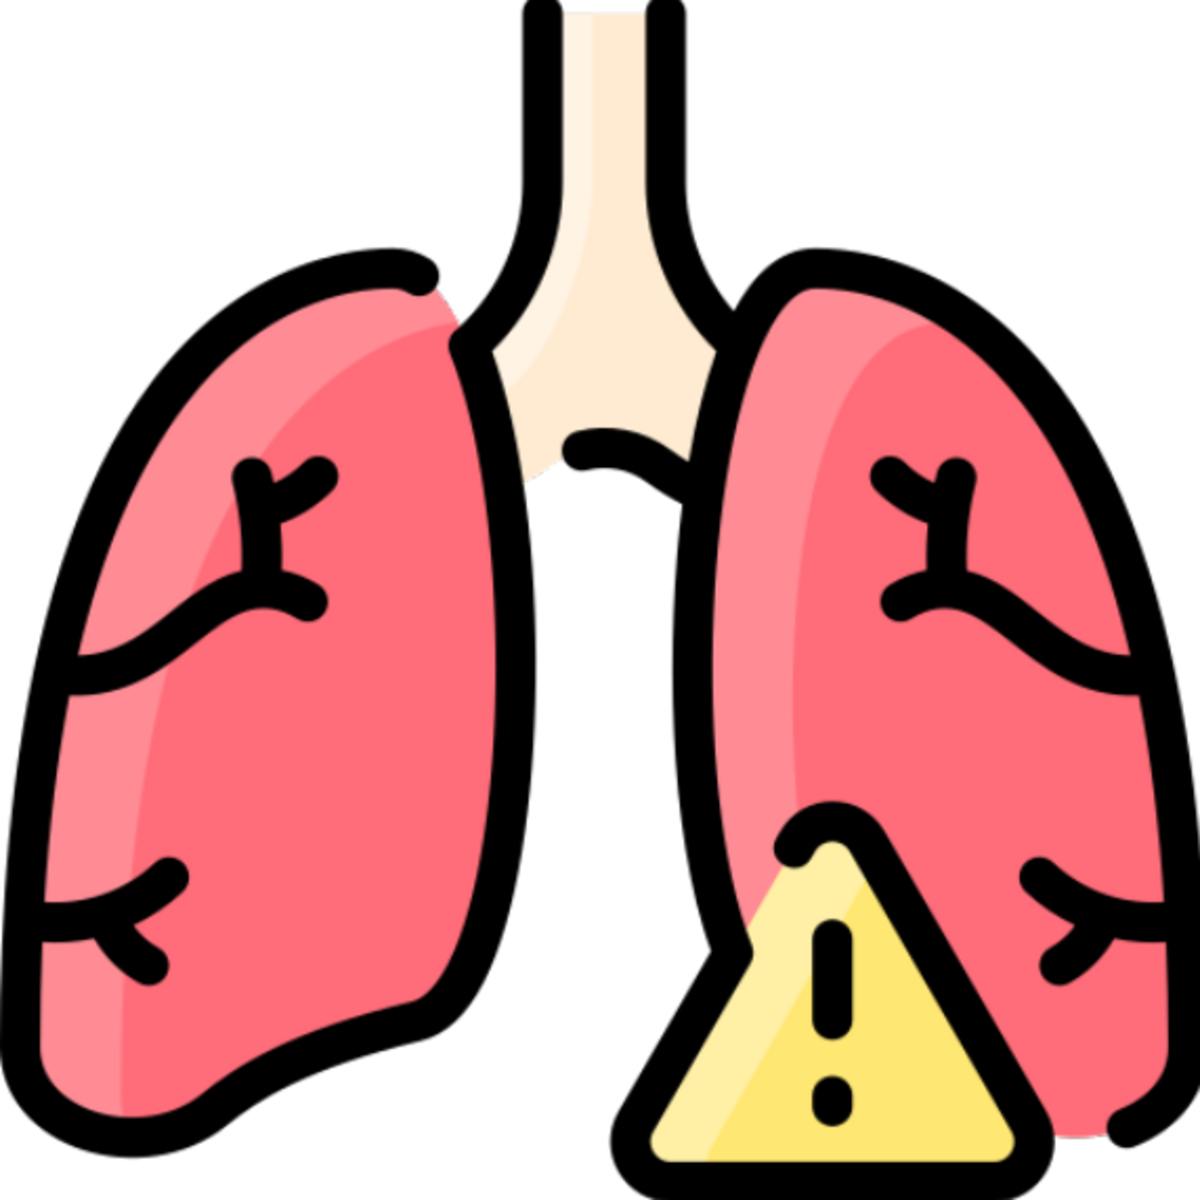

# **LECTURA DE DATOS Y ANALISIS BASICO**

In [ ]:
#importamos todas las librerias
import pandas as pd
import numpy as np
from google.colab import drive
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
drive.mount('/content/gdrive')
import urllib.request
from scipy import stats
from scipy.stats import norm, skew
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#cargamos los datos
%cd '/content/gdrive/MyDrive/PY/'
cancer = pd.read_csv('cancerp.csv',sep=',')

/content/gdrive/MyDrive/CODER/PY


# **Realizamos el EDA**



**Preparar los datos**
Para predecir el nivel específico de cáncer de pulmón de un paciente, la columna "Nivel" servirá como nuestra variable objetivo. Antes de continuar con la predicción, debemos separar la variable objetivo del resto de los datos. Además, es crucial manejar las variables que faltan para mantener la consistencia de los datos.

Realizamos cambio de los nombres a las columnas para una mejor manipulación, además cambiamos la columna de nivel de riesgo a valores numéricos y así poder comparar con las otras variables, también eliminamos las columnas de índex e id del paciente ya que no aportan al análisis de predicción de cáncer de pulmón

In [ ]:
cancer = cancer.rename ( columns = {'Age': 'Edad', 'Gender' : 'Genero', 'Air Pollution' : 'Contaminación del aire', 'Alcohol use' : 'Consumo de alcohol','Dust Allergy' : 'Alergia al polvo', 'OccuPational Hazards' : 'Riesgos ocupacionales','Genetic Risk' : 'Riesgo genético','chronic Lung Disease' : 'Enfermedad pulmonar','Balanced Diet' : 'Dieta equilibrada','Obesity' : 'Obesidad','Smoking' : 'Fumador activo','Passive Smoker' : 'Fumador pasivo','Chest Pain' : 'Dolor en el pecho','Coughing of Blood' : 'Tos con sangre','Fatigue' : 'Fatiga','Weight Loss' : 'Pérdida de peso','Shortness of Breath' : 'Dificultad para respirar','Wheezing' : 'Sibilancias','Swallowing Difficulty' : 'Dificultad para tragar','Clubbing of Finger Nails' : 'Clubbing de uñas','Frequent Cold' : 'Resfriado frecuente','Dry Cough' : 'Tos seca','Snoring' : 'Ronquidos','Level' : 'Nivel_de_Riesgo'} )

In [ ]:
cancer["Nivel_de_Riesgo"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
cancer.drop(["index", "Patient Id"], axis = 1, inplace = True)

# Realizamos una Visualización de los datos

In [ ]:
cancer.head()

,Edad,Genero,Contaminación del aire,Consumo de alcohol,Alergia al polvo,Riesgos ocupacionales,Riesgo genético,Enfermedad pulmonar,Dieta equilibrada,Obesidad,...,Fatiga,Pérdida de peso,Dificultad para respirar,Sibilancias,Dificultad para tragar,Clubbing de uñas,Resfriado frecuente,Tos seca,Ronquidos,Nivel_de_Riesgo
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [ ]:
cancer.tail()

,Edad,Genero,Contaminación del aire,Consumo de alcohol,Alergia al polvo,Riesgos ocupacionales,Riesgo genético,Enfermedad pulmonar,Dieta equilibrada,Obesidad,...,Fatiga,Pérdida de peso,Dificultad para respirar,Sibilancias,Dificultad para tragar,Clubbing de uñas,Resfriado frecuente,Tos seca,Ronquidos,Nivel_de_Riesgo
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
999,47,1,6,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2


In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Edad                      1000 non-null   int64
 1   Genero                    1000 non-null   int64
 2   Contaminación del aire    1000 non-null   int64
 3   Consumo de alcohol        1000 non-null   int64
 4   Alergia al polvo          1000 non-null   int64
 5   Riesgos ocupacionales     1000 non-null   int64
 6   Riesgo genético           1000 non-null   int64
 7   Enfermedad pulmonar       1000 non-null   int64
 8   Dieta equilibrada         1000 non-null   int64
 9   Obesidad                  1000 non-null   int64
 10  Fumador activo            1000 non-null   int64
 11  Fumador pasivo            1000 non-null   int64
 12  Dolor en el pecho         1000 non-null   int64
 13  Tos con sangre            1000 non-null   int64
 14  Fatiga                    1000 non-null  

In [ ]:
cancer.describe()

,Edad,Genero,Contaminación del aire,Consumo de alcohol,Alergia al polvo,Riesgos ocupacionales,Riesgo genético,Enfermedad pulmonar,Dieta equilibrada,Obesidad,...,Fatiga,Pérdida de peso,Dificultad para respirar,Sibilancias,Dificultad para tragar,Clubbing de uñas,Resfriado frecuente,Tos seca,Ronquidos,Nivel_de_Riesgo
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


# Utilizamos el Metodo PCA para reducir dimensionalidad

In [ ]:
scaler = StandardScaler()
scaler.fit(cancer.drop(['Genero'], axis = 1).values)
cancer_estandarizado = scaler.transform(cancer.drop(['Genero'], axis = 1).values)

In [ ]:
pca = PCA()
pca.fit(cancer_estandarizado)
pca_cancer_estandarizado = pca.transform(cancer_estandarizado)

In [ ]:
varianza_explicada = np.round(pca.explained_variance_ratio_*100, 2)
varianza_explicada

array([42.71, 11.82,  9.15,  6.59,  5.5 ,  4.55,  3.01,  2.67,  2.36,
        2.17,  1.87,  1.53,  1.23,  1.02,  0.97,  0.7 ,  0.52,  0.45,
        0.37,  0.31,  0.27,  0.12,  0.1 ])

In [ ]:
np.cumsum(varianza_explicada)

array([42.71, 54.53, 63.68, 70.27, 75.77, 80.32, 83.33, 86.  , 88.36,
       90.53, 92.4 , 93.93, 95.16, 96.18, 97.15, 97.85, 98.37, 98.82,
       99.19, 99.5 , 99.77, 99.89, 99.99])

# Realizamos Grafico de codo

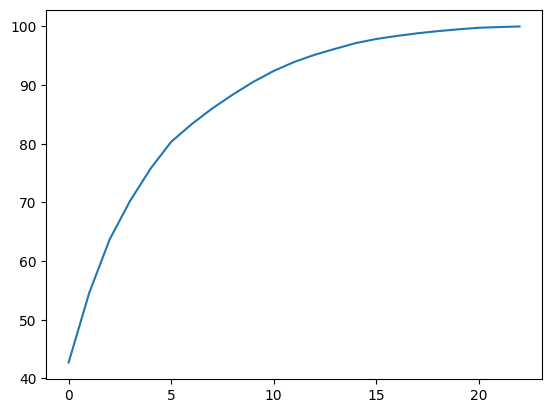

In [ ]:
plt.plot( np.cumsum(varianza_explicada));

Nos muestra un grafico de codo poco pronunciado

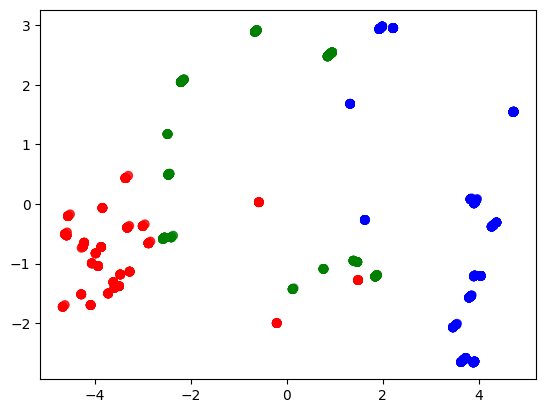

In [ ]:
colores = {0: 'red', 1: 'green',2:'blue'}
plt.scatter(pca_cancer_estandarizado[:, 0], pca_cancer_estandarizado[:, 1],  color = [colores[i] for i in cancer.Nivel_de_Riesgo] ,alpha = 0.8);

Muestra un conjunto de datos parcialmente divididos.

# ***Análisis Univariado.***

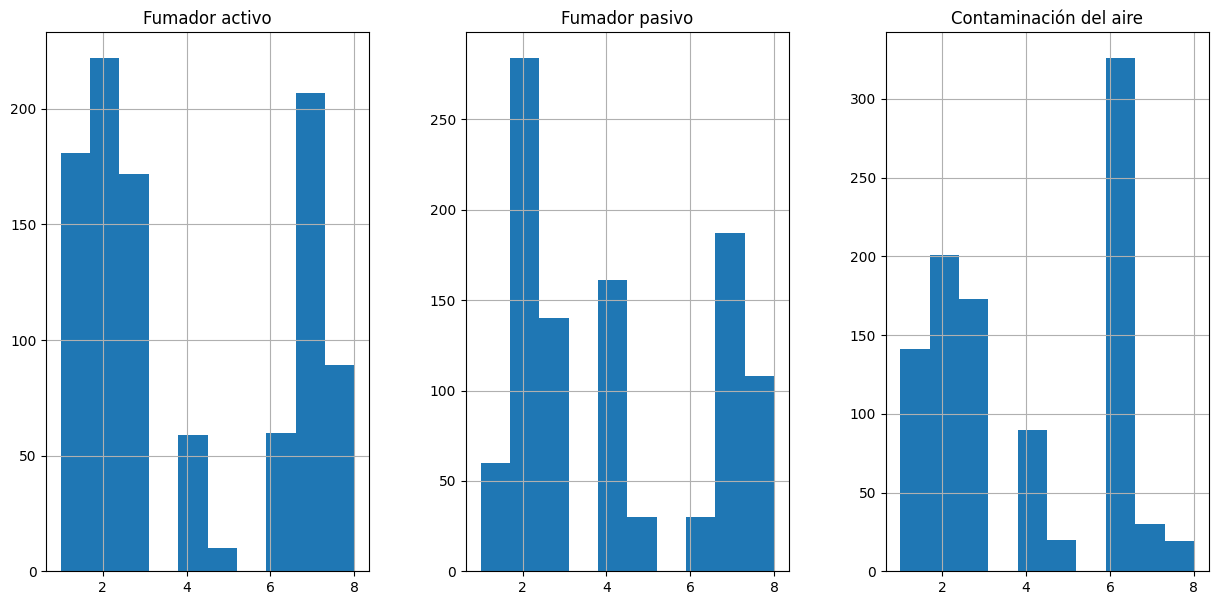

In [ ]:
# Histograms
columna = [
    'Fumador activo','Fumador pasivo','Contaminación del aire'
]
print('\n')
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 7))
ax = ax.flatten()
i = 0

for c in columna:
    cancer.hist(c, figsize=(2,2), ax=ax[i], label=f'{c}')
    i = i + 1;
plt.show()
print('\n')

Por qué usamos solo fumador activo, pasivo y nivel de contaminacion del aire?

A partir de una investigación realizada en varios sitios web, se ha confirmado que fumar es la principal causa de cáncer de pulmón. De acuerdo con los Centros para el Control y la Prevención de Enfermedades, "Fumar cigarrillos es la causa número uno de cáncer de pulmón".

El tabaquismo pasivo también representa un riesgo significativo para la salud. Inhalar el humo de alguien que fuma es igualmente peligroso que fumar directamente. Según Cancer Research UK, "el tabaquismo pasivo es peligroso y puede causar muchas de las mismas enfermedades que el tabaquismo".

Además del tabaquismo, la contaminación del aire también tiene un impacto similar en el desarrollo del cáncer de pulmón. Según el sitio web de Berkeley Earth, "un nivel de PM2.5 de 22 μg/m^3 (microgramos por metro cúbico) equivale aproximadamente a fumar un cigarrillo al día. En los Estados Unidos y Europa, la contaminación del aire tiene efectos perjudiciales para la salud equivalentes a fumar entre 0,4 y 1,6 cigarrillos al día".

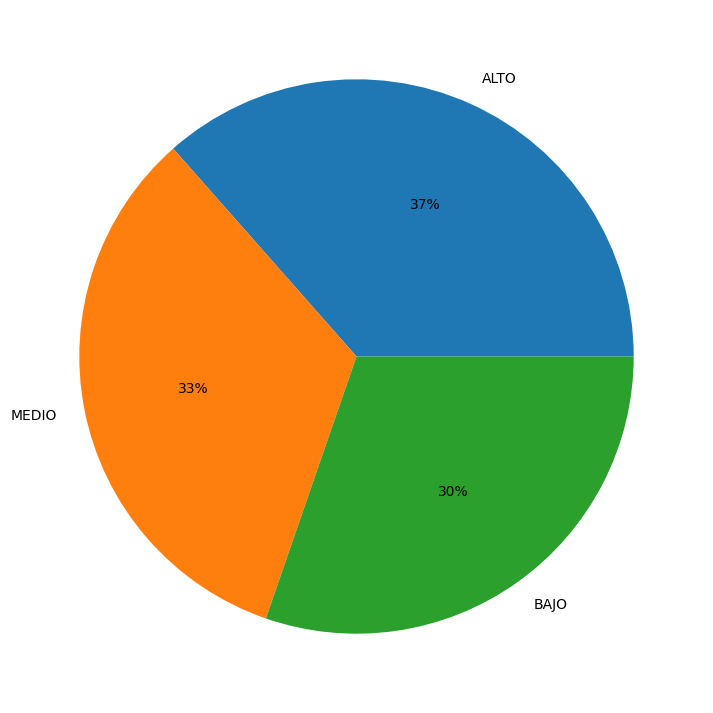

In [ ]:
#vizualizamos como se distribulle la cantidad de casos en los tipos ALTO - MEDIO - BAJO
plt.figure(figsize = (11, 9))
plt.pie(cancer['Nivel_de_Riesgo'].value_counts(),labels = ['ALTO','MEDIO','BAJO'],autopct='%.0f%%');


En el gráfico de torta, se puede observar de manera evidente que la gran mayoría de los pacientes analizados presentan un nivel de riesgo de cáncer de pulmón  "Alto". Esta representación visual refleja claramente la prevalencia de casos con un mayor grado de severidad en relación con esta enfermedad. Este hallazgo es de suma importancia, ya que resalta la necesidad de una detección temprana y un enfoque preventivo más intensivo para abordar y tratar adecuadamente el cáncer de pulmón en la población estudiada.


<ipython-input-18-45e197284741>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cancer.Edad, shade = True, color = "r")


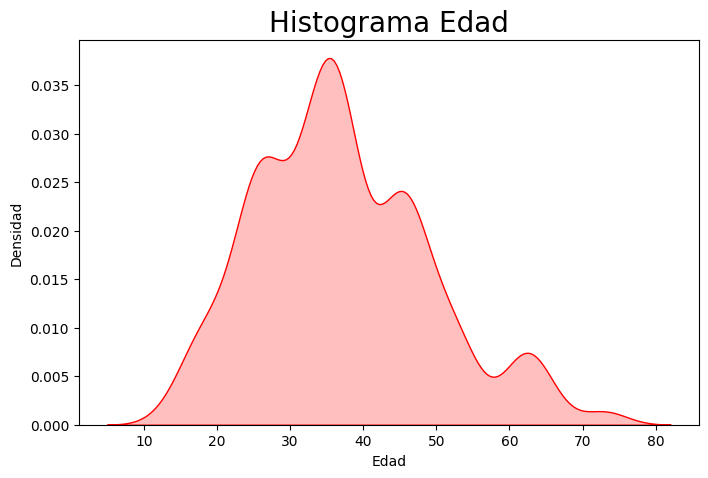

In [ ]:
plt.figure(figsize = (8,5))
sns.kdeplot(cancer.Edad, shade = True, color = "r")
plt.title("Histograma Edad", fontsize = 20)
plt.ylabel("Densidad")
plt.show();

#print("Histogram's skewness is {} and kurtosis is {}".format(cancer.Edad.skew(), cancer.Edad.kurtosis()))


El análisis de los datos revela un hallazgo interesante: el grupo de edad con mayor tendencia a sufrir cáncer de pulmón no se encuentra entre los más avanzados en edad. Contrariamente a lo que se podría esperar, son las personas cuyas edades oscilan entre los 30 y los 40 años las que presentan un riesgo significativamente mayor. Esto plantea interrogantes y destaca la importancia de investigar los factores específicos que podrían estar contribuyendo a esta tendencia inusual en el desarrollo del cáncer de pulmón en este grupo demográfico.

# ***Análisis Bivariado.***

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

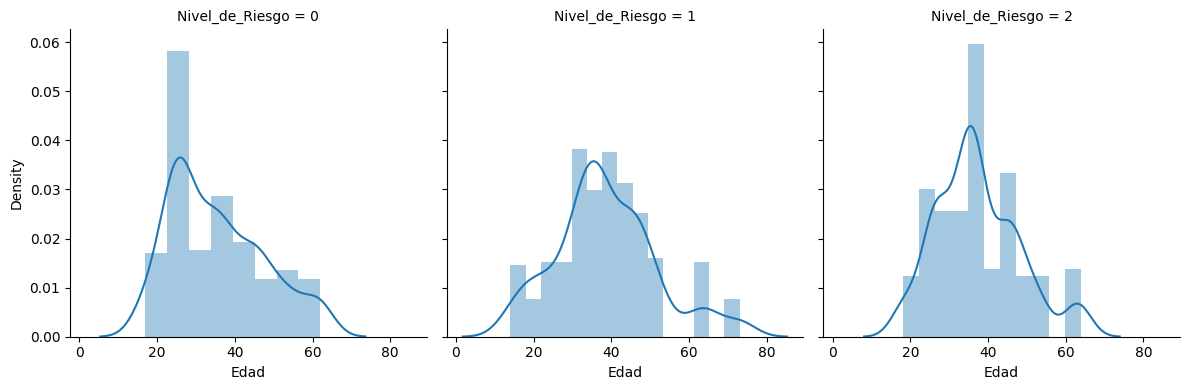

In [ ]:
conjunto = sns.FacetGrid(cancer, col = "Nivel_de_Riesgo", height = 4);
conjunto.map(sns.distplot, "Edad")
plt.ylabel("Densidad");

Analizando las variables de edad y nivel de riesgo de cancer de pulmon podemos observar que muestra un gran volumen de pacientes cuyas edades ocilan los 20 a 40 años en el nivel "bajo", pasando al nivel medio y alto ya el volumen de pacientes se concentra entre las edades de 30 a 40 años,

Estos atributos demográficos son de gran importancia para realizar análisis y estudios epidemiológicos, ya que pueden ayudar a comprender mejor las características de la enfermedad en diferentes grupos de población. La edad puede revelar patrones de incidencia y prevalencia del cáncer de pulmón en diferentes etapas de la vida, mientras que el sexo puede desempeñar un papel en la predisposición genética o la exposición a factores de riesgo específicos.

#Realizamos un mapa de calor para ver las relaciones entre las variables

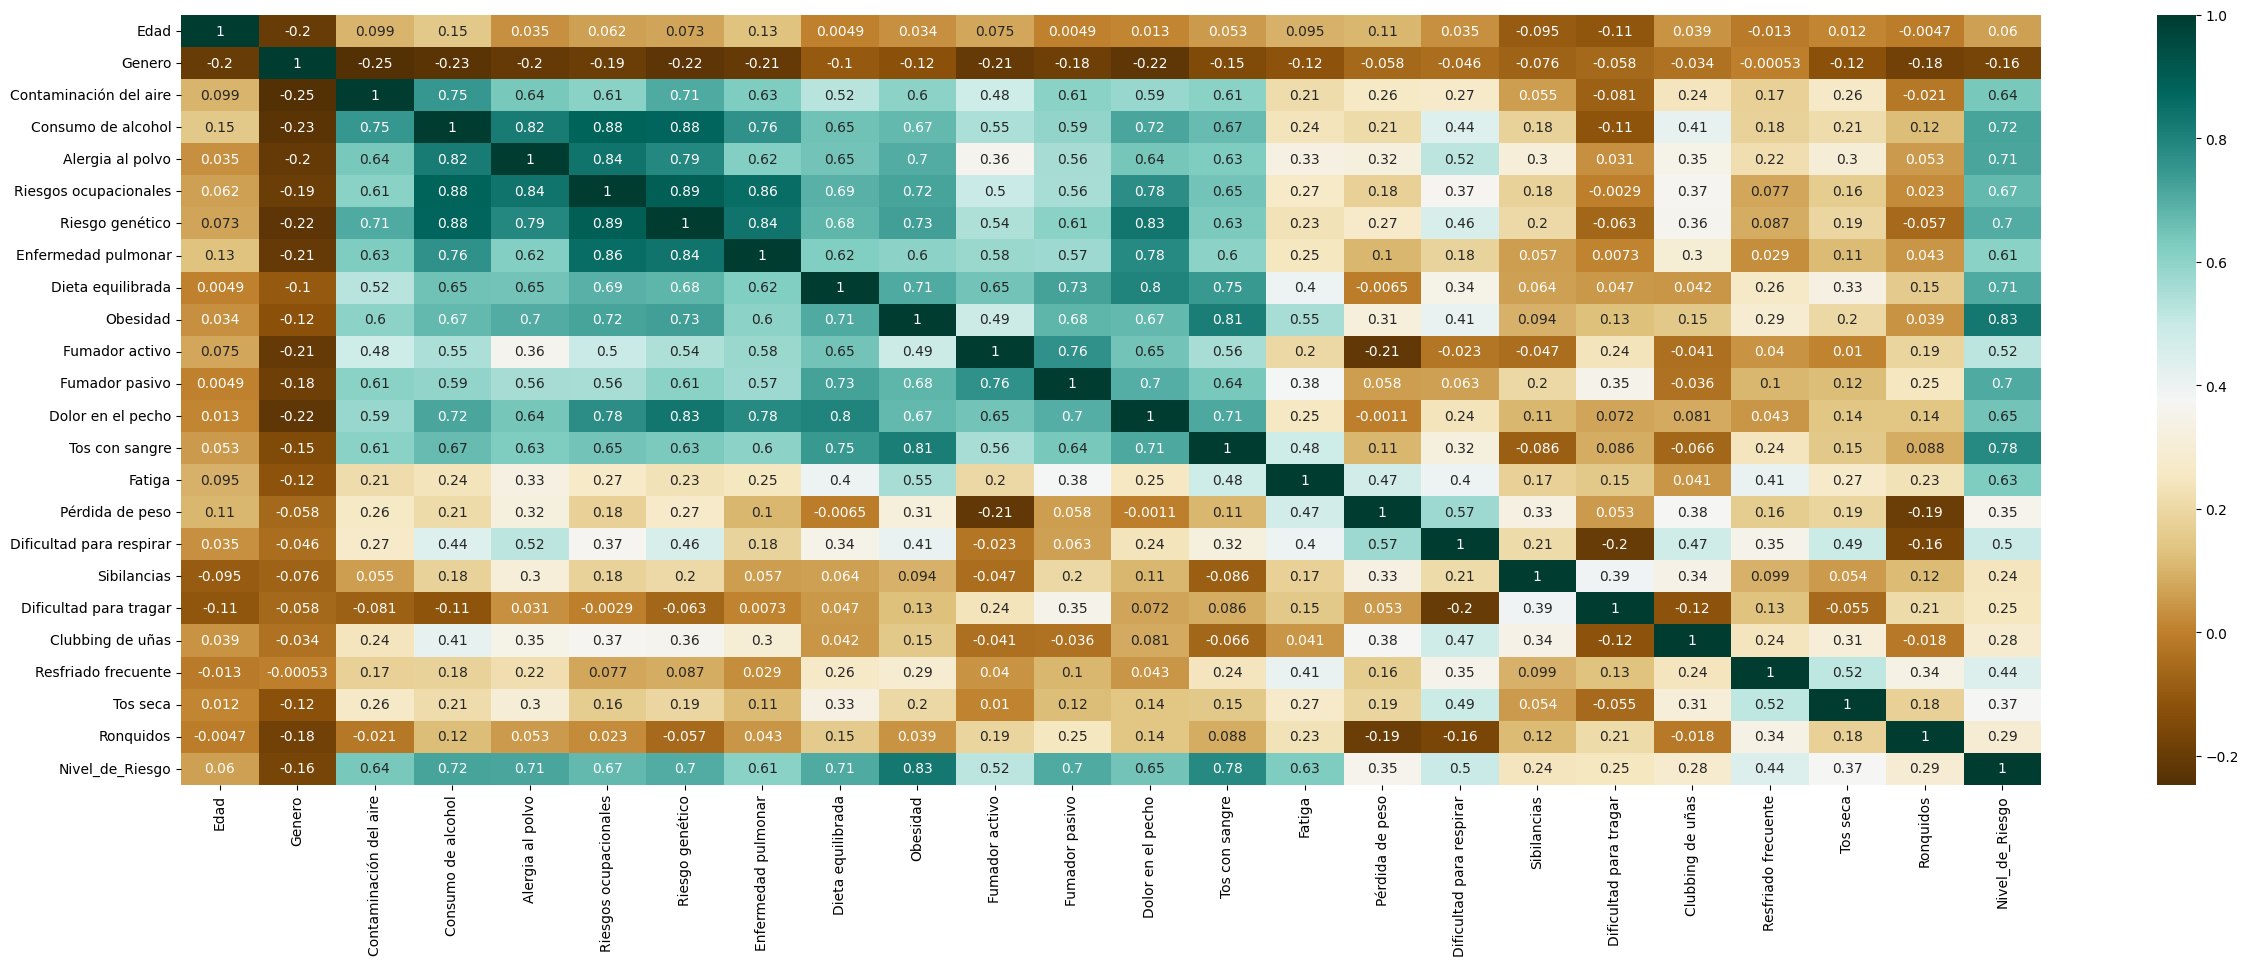

In [ ]:
plt.figure(figsize = (30,10))
sns.heatmap(cancer.corr(), cmap='BrBG', annot=True)
plt.show()

En este heatmap, se presentan las relaciones entre cada una de las variables en cuestión. Al analizarlo detenidamente, resulta evidente que existe una correlación notablemente alta, concretamente de 0.89, entre dos variables en particular: Riesgos Laborales y Riesgo Genético.

También nos muestra que la obesidad, la contaminación del aire, la dieta balanceada, la tos con sangre, el tabaquismo pasivo están fuertemente correlacionados con el cáncer de pulmón, por lo que debemos estar alerta cuando estos factores se nos presenten.

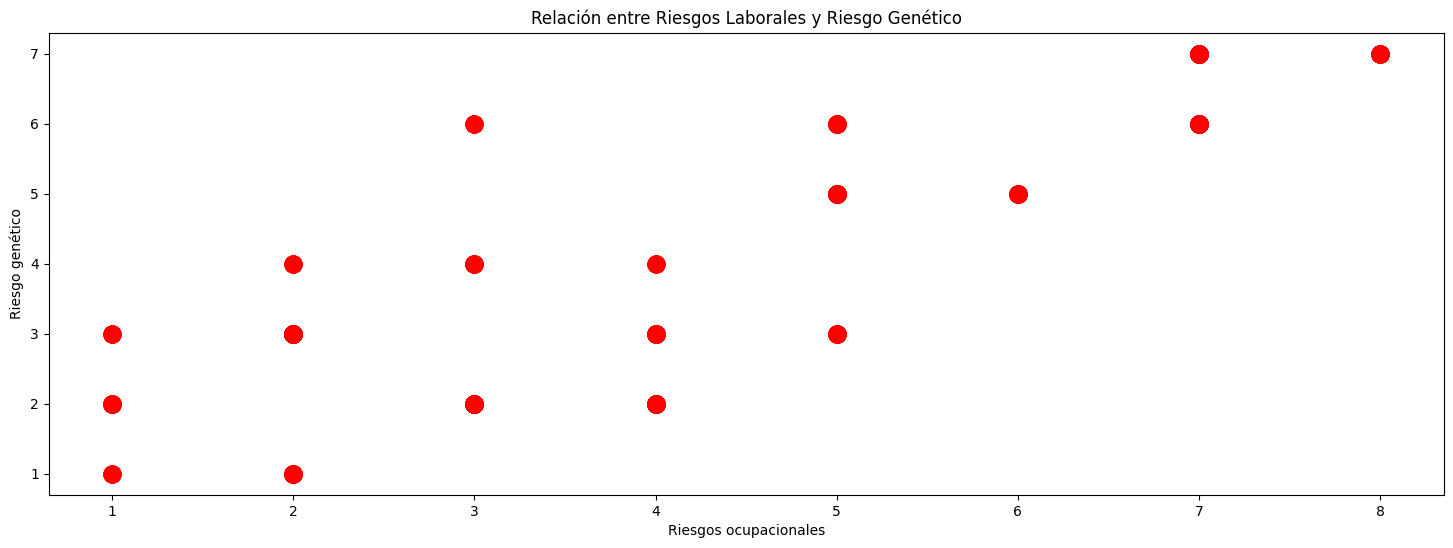

In [ ]:
rel = plt.figure(figsize=(18, 6))
plt.xlabel("Riesgos ocupacionales")
plt.ylabel("Riesgo genético")
plt.title("Relación entre Riesgos Laborales y Riesgo Genético")
plt.scatter(cancer["Riesgos ocupacionales"],cancer["Riesgo genético"],alpha=0.7,c="red",linewidths=7);

Existe una correlación positiva entre ellos ya que las personas con alto riesgo genético tienen altos riesgos laborales.

Text(7.5, 258, 'MUJER')

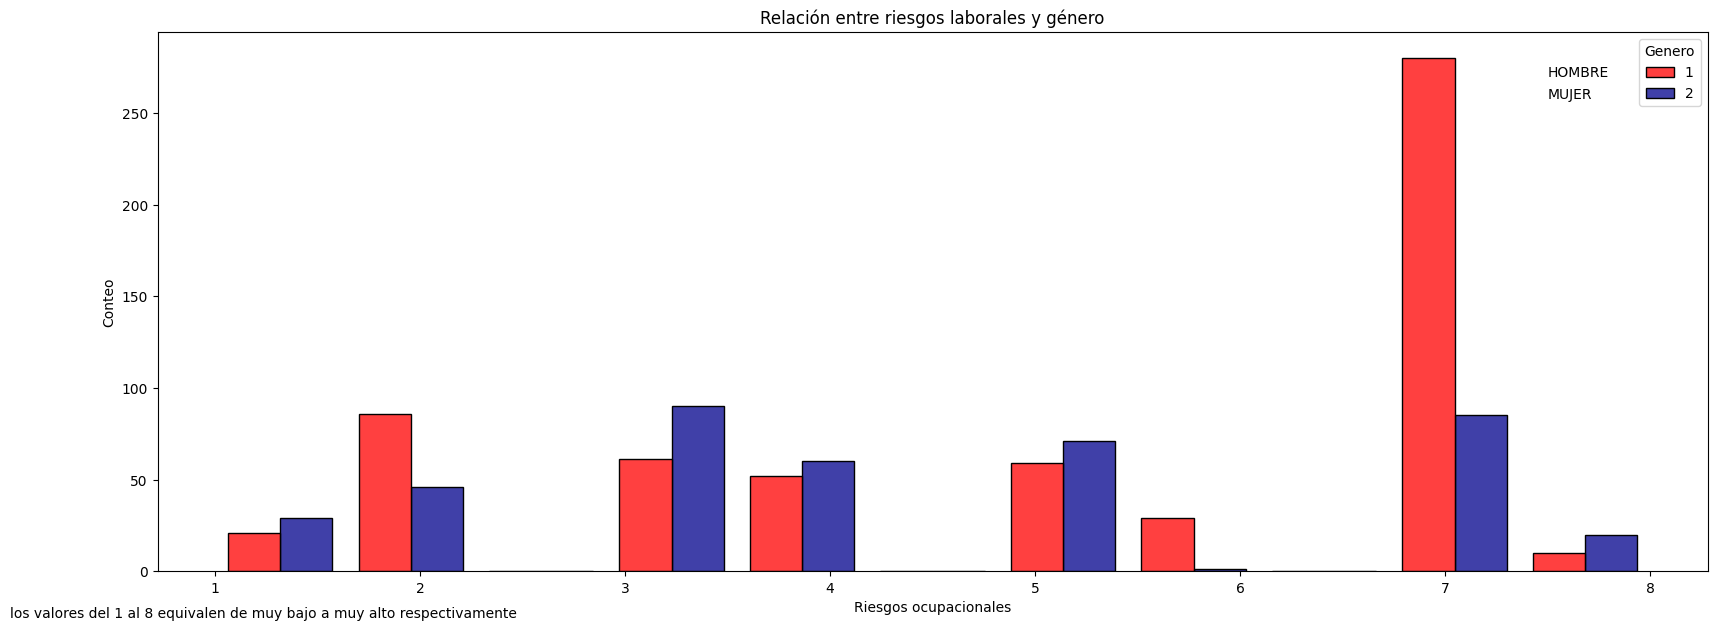

In [ ]:
plt.subplots(figsize=(20, 7))

sns.histplot(data=cancer, x=cancer["Riesgos ocupacionales"], hue=cancer["Genero"], multiple="dodge", shrink=.8,palette=["red","darkblue"]).set(title='Relación entre riesgos laborales y género')
plt.ylabel("Conteo")
plt.text(0,-25,"los valores del 1 al 8 equivalen de muy bajo a muy alto respectivamente",fontsize=10);
plt.text(7.5,270,"HOMBRE",fontsize=10)
plt.text(7.5,258,"MUJER",fontsize=10)


Los hombres son más propensos a contraer enfermedades pulmonares con una proporción alta en comparación con las mujeres

#Definimos matriz de diseño X y vector respuesta Y

In [ ]:
X = cancer.drop(columns='Nivel_de_Riesgo')
Y = cancer.Nivel_de_Riesgo

#Dividimos los datos de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

# **Elegimos los modelos a entrenar**




#Llamamos al constructor de arbol de decision y entrenamos el modelo.

In [ ]:
arbol = DecisionTreeClassifier(max_depth=3)

arbol_cancer = arbol.fit(X_train, Y_train)

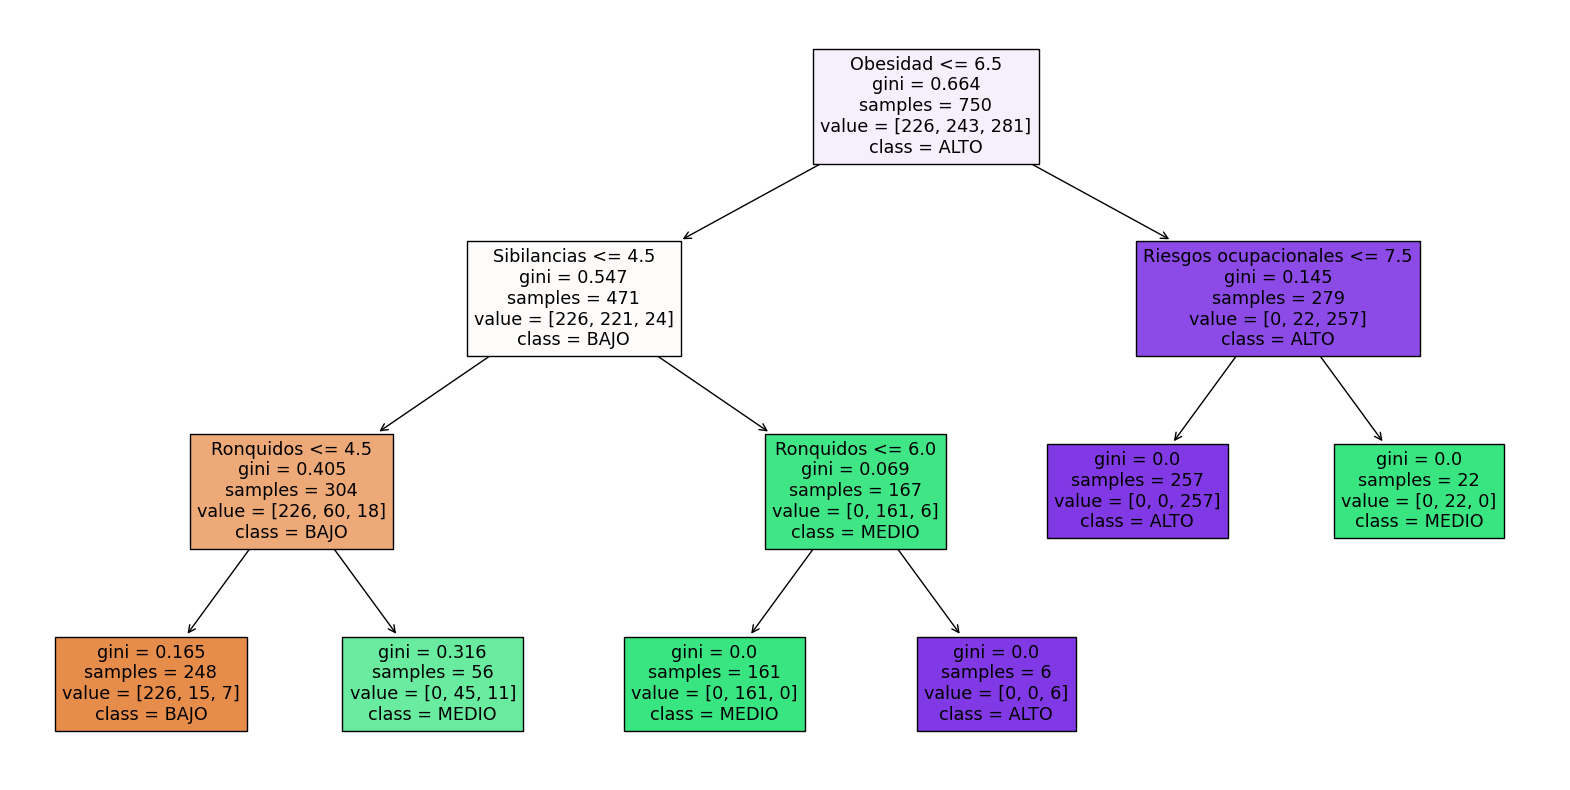

In [ ]:
fig = plt.figure(figsize=(20,10)) #indicamos las dimensiones del grafico
tree.plot_tree(arbol_cancer , feature_names=list(X.columns),class_names=['BAJO','MEDIO','ALTO'] ,filled=True)
plt.show();

In [ ]:
y_predecidos = arbol.predict(X_test)
arbol_proba = arbol.predict_proba(X_test)[:,1]

In [ ]:
y_predecidos == Y_test

29     True
852    True
918    True
945    True
968    True
       ... 
717    True
408    True
173    True
468    True
239    True
Name: Nivel_de_Riesgo, Length: 250, dtype: bool

**Creamos Matriz de confusion**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_predecidos)
print(cm)

[[77  0  0]
 [ 5 84  0]
 [ 3  8 73]]


**Calculamos el Accuracy**

In [ ]:
accuracy_score(Y_test, y_predecidos)

0.936

# Podemos visualizar que este modelo tiene una precisión del 94% aprox

In [ ]:
#Incorporando caracteristicas al modelo

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-0.25934387, -0.81649658,  1.01319852, ...,  1.36993791,
         1.57403522,  1.45837054],
       [ 0.65461893, -0.81649658,  1.01319852, ...,  0.26037697,
         1.08071035,  1.45837054],
       [-0.01008129, -0.81649658,  1.01319852, ...,  1.92471838,
         1.08071035, -0.60926255],
       ...,
       [ 0.98696904, -0.81649658,  1.01319852, ...,  1.36993791,
         1.57403522, -0.60926255],
       [-1.67183184, -0.81649658, -0.45096119, ..., -1.40396444,
         1.57403522, -0.60926255],
       [ 0.82079399,  1.22474487, -0.93901443, ..., -0.2944035 ,
         0.09406061, -0.60926255]])

In [ ]:
X_test

array([[-0.75786903,  1.22474487, -1.42706766, ...,  1.92471838,
         1.57403522,  1.45837054],
       [-0.17625634, -0.81649658, -0.93901443, ..., -0.2944035 ,
        -0.89258913,  0.07994848],
       [-0.17625634,  1.22474487, -0.93901443, ...,  1.36993791,
         0.58738548,  2.8367926 ],
       ...,
       [ 1.48549421, -0.81649658, -0.45096119, ...,  0.26037697,
         0.58738548, -0.60926255],
       [ 1.48549421, -0.81649658, -0.45096119, ...,  0.26037697,
         0.58738548, -0.60926255],
       [-0.25934387, -0.81649658,  1.01319852, ...,  1.36993791,
         1.57403522,  1.45837054]])

# **Llamamos al modelo de KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = knn.predict(X_test)

**Creamos matriz de confusion**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


[[77  0  0]
 [ 0 89  0]
 [ 0  0 84]]


**Calculamos el Accuracy**

In [ ]:
accuracy_score(Y_test, Y_pred)

1.0

# Podemos visualizar que este modelo tiene una precisión del 100%